<a href="https://colab.research.google.com/github/campusplage/multidimensional-compte-rendus/blob/master/TP1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 1: `pandas` et visualisation


---
Ce notebook contient votre compte-rendu pour le TP1.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# 1. Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.

## a. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## b. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
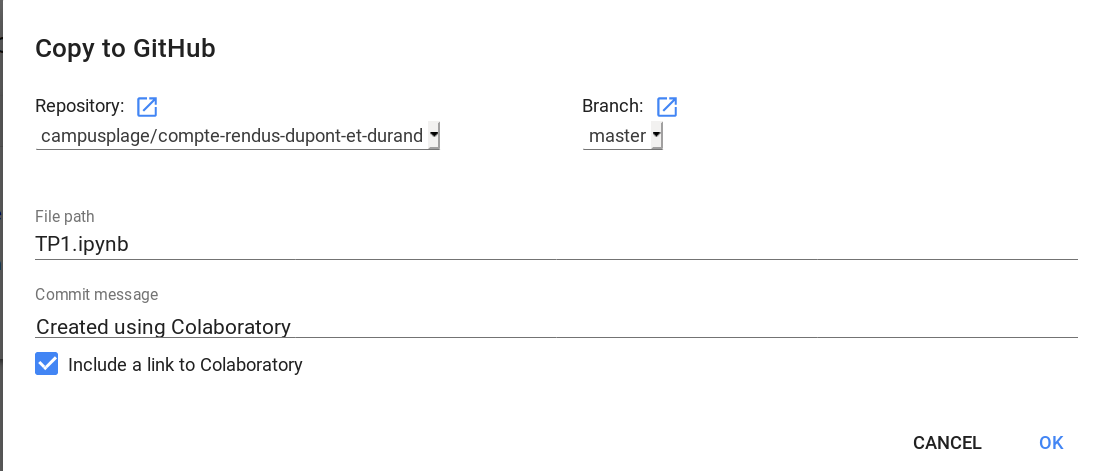

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 2. Charger des données (2 points)


1. Créez un `DataFrame` appelé `raw_data` à partir du fichier suivant:
https://husson.github.io/img/pluie.csv 
2. Renommez la première colonne `Ville` et utilisez-la en index
3. Affichez les premières lignes de la structure créée

> Modifiez la cellule suivante pour effectuer ces opérations

In [0]:
# on importe le package pandas
import pandas


# Commentez chaque ligne de code !
# VOTRE TRAVAIL ICI


Executez ensuite le code suivant, et commentez à chaque fois qu'il y a marqué "Commentez".

In [0]:
# Commentez
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
          'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
# Commentez
types = ['Précipitations', 'Jours de pluie']

# Commentez
index = pandas.MultiIndex.from_product((types, months),
                                       names=['Grandeur', 'Mois'])

# Commentez
nested_columns = list(range(12)) + list(range(13, 25))

# on crée une DataFrame, avec un multi-index pour ces colonnes imbriquées
data = pandas.DataFrame(raw_data.iloc[:,rain_columns].to_numpy(), columns=index)

# Commentez
data = data.set_index(raw_data.index)

# Commentez 
other_columns = ['Température moyenne annuelle', 'Amplitude annuelle des températures',
                 'Insolation annuelle', 'Latitude', 'Longitude', 'Géographie']
data[other_columns] = raw_data[other_columns]

# Affichage
data.head()

Comme vous le constatez, `pandas` est en fait encore plus puissant que ce que je vous ai raconté: on peut avoir des index imbriqués, à la fois pour les lignes et pour les colonnes. Cela peut s'avérer très pratique pour manipuler des données réellement compliquées.

> En pratique, cela signifie qu'une colonne donnée d'un `DataFrame` n'est pas forcément un objet `Series`, contrairement à ce que je vous avais dit à des fins pédagogiques.

> Dans le code ci-dessus, on a éliminé les colonnes redondantes (qu'on peut calculer simplement à partir des données)

# 3. Indiçage (3 points)

À ce stade, vous devriez disposer d'un objet `data`, qui regroupe les données dans un `DataFrame`. 

> Dans chacune des cellules suivantes, écrivez le code nécessaire à répondre à la question posée.

In [0]:
# Affichez seulement les précipitations mensuelles de toutes les villes


In [0]:
# Affichez le nombre de jours de pluie de toutes les villes pour les mois de "Juin", "Juillet" et "Août"

In [0]:
# Affichez une phrase qui indique la latitude et longitude d'Angoulème.
# (utilisez `loc` et le formattage de chaines de caractère avec print)

> Dans l'exemple précédent, vous aurez peut-être noté que `data.at['Angoulème', 'Longitude']` ne marche pas.  
Cela est du au fait que `data` a un multi-index pour ses colonnes. Cela signifie qu'en fait, une entrée particulière est donnée par la spécification de toutes les valeurs pour ses colonnes. Cela donnerait:
``` data.at['Angoulème', ('Longitude','')]```.  
   L'utilisation de `loc` permet de s'affranchir de cette complication.

In [0]:
# Affichez les nombres de jours de pluie mensuels de toutes les données aux villes ayant un nom compris
# entre "Montpellier" et "Paris" dans l'ordre alphabétique

In [0]:
# Affichez à la fois les précipitations mensuelles et la "Géographie" des mêmes villes 

In [0]:
# Affichez les trois dernières colonnes de la table pour les 15 premières villes

# 4. Réorganisation et pivotage  (4 points)


## a. Groupage des niveaux dans un `MultiIndex`


On dispose d'un objet `data` qui a un MultiIndex sur ses colonnes.

Plutôt que de stocker des données redondantes comme dans les données initiales (colonnes 'Nombre annuel de jours de pluie' ou 'Précipitations sept-oct' par exemple), il est plus judicieux de les calculer à la demande.

Une fois encore, `pandas` dispose de nombreux moyens de regrouper, agrégrer, réorganiser les données.

Dans notre exemple, on peut facilement réunir toutes les données mensuelles, pour calculer les précipitations et nombres de jours de pluie annuels.  
Cela se fait avec la fonction [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). En l'occurrence, on voit que le paramètre `level` correspond exactement à ce qu'on cherche

In [0]:
grouped_data = data.groupby(axis=1, level='Grandeur')

En fait, `groupby` retourne des __groupes__ sur les données. Ici par exemple, toutes les valeurs de précipitations de nombres de jours de pluie sont groupées.

Ce qui est renvoyé par `groupby` est ici un objet de type `DataFrameGroupBy`, tel que décrit [ici](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). 
Pour rentrer un peu dans les détails, on peut afficher les groupes créés.

In [0]:
# par une petite boucle sur les différents groupes créés, on peut en afficher le nom
for group in grouped_data.groups:
  print(group)

Et ici, on est simplement intéressés par le total au sein de chaque groupe. Il suffit d'appliquer la fonction `max`.

In [0]:
# Afficher pour toutes les villes le nombre annuel de jours de pluie et les précipitations annuelles.

In [0]:
# Comparer avec les colonnes correspondantes de `raw_data`. 
# vous pouvez utiliser `to_numpy` et l'opérateur de comparaison `==`

Maintenant, recalculez-vous même les cumuls de précipitations et de jours de pluie de mai à août.

> Pour vous aider, regardez ce que donne:  
  `data.loc[:,(['Précipitations','Jours de pluie'], [None, 'Janvier','Mars'])]`

In [0]:
# cumul des précipitations et du nombre de jours de pluie de mai à août

## b. Pivotage




En partant de la table initiale, génerer une table ressemblant à:



| |Ville | Grandeur | Mois | Valeur |
|-|------|----------|------|--------|
|0|Ajaccio|Précipitations|Janvier|78.0|
|1|Angers|Précipitations|Janvier|65.0|
...
|814|Tours|Jours de pluie|Décembre|16.0|
|815|Vichy|Jours de pluie|Décembre|16.0|

> _Conseil_: utilisez `melt`

In [0]:
# premier pivot des données avec melt

À présent, génerer une table ressemblant à:

| |Ville | Géographie | Grandeur | Mois | Valeur |
|-|------|------------|----------|------|--------|
|0|Ajaccio|Sud|Précipitations|Janvier|78.0|
|1|Angers|Ouest|Précipitations|Janvier|65.0|
...
|814|Tours|Ouest|Jours de pluie|Décembre|16.0|
|815|Vichy|Est|Jours de pluie|Décembre|16.0|

> _Conseil_: dans `melt`, le paramètre `index` peut être une liste...

In [0]:
# deuxième pivot

Affichez les précipitations mensuelles moyennes pour chaque zone géographique

> conseil: utilisez `pivot_table`

In [0]:
# précipitations mensuelles moyennes

# 5. Visualisation (6 points)

## a. boxplot et violinplot

Dans la dernière partie de ce compte rendu, nous allons afficher des figures permettant de visualiser les données.

Commencez par afficher des boîte à moustache donnant pour chaque mois la distribution du nombre de jours de pluie sur l'ensemble des villes.
Le résultat doit ressembler à:
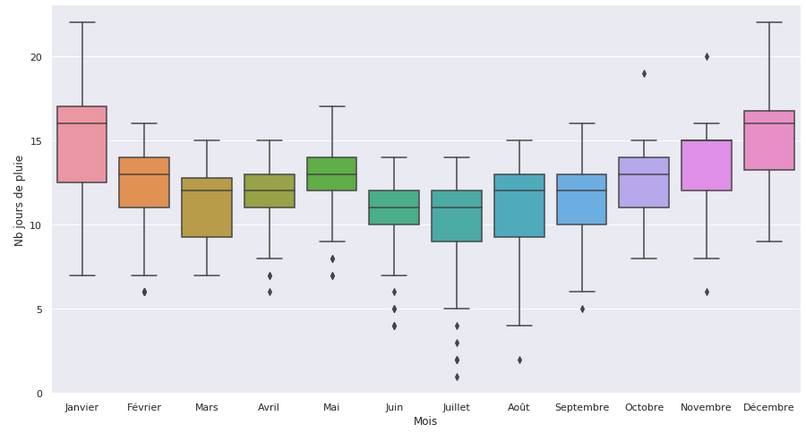

> conseil: utiliser le résultat des questions précédentes (celles avec `melt`)

In [0]:
# Distribution mensuelle des nombres de jours de pluie...
import seaborn as sns
sns.set()

# VOTRE CODE ICI

Sophistiquez l'affichage précédent pour que les distributions se fassent en fonction de la zone géographique. Le résultat doit ressembler à:

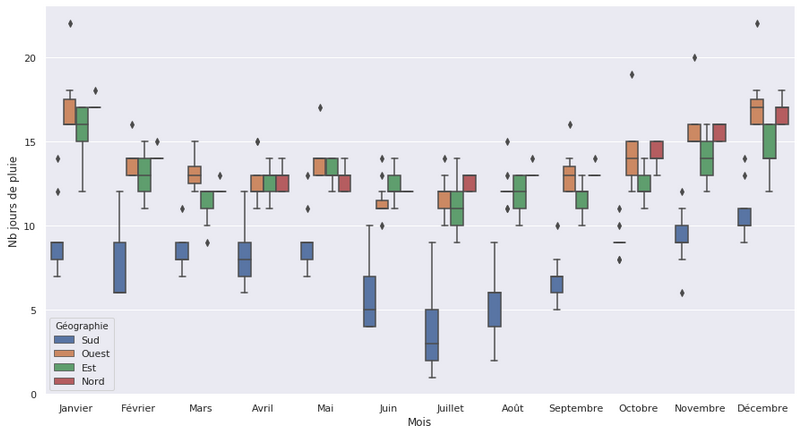

> _conseil_: utilisez le paramètre `by` de [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) 

In [0]:
# boxplot par différentes zones géographiques....

Enfin, affichez la distribution marginale des précipitations en fonction de la zone géographique.

Le résultat doit ressembler à:


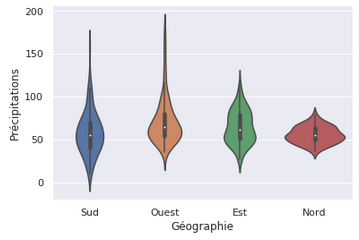

In [0]:
# Affichage de la distribution marginale des précipitations par zone géographique

## b. Affichages extras (points bonus)

> Cette section est à faire tout à la fin, quand vous aurez traité l'ensemble des TPs de ce cours.

Réalisez toute sorte d'affichage sur ces données que vous pourriez trouver joli et utile. La qualité des affichages et la difficulté pour les réalisée sera prise en compte dans la notation !


Ci-dessous, un exemple, mais soyez créatifs !!

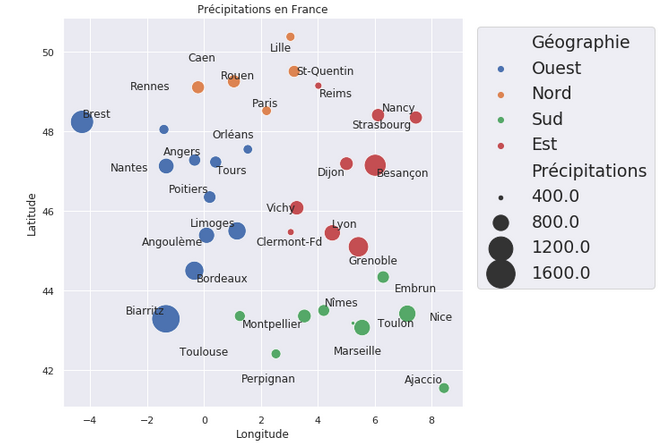